Идея: KAN могут помочь интепритировать резульатат 
Поставновкаа задачи: 
1) сгенерировать данные из нормального распределения
2) с помощью KDE(kernel disity estimation) получть функцию плоности данной выборки
3) применить к полученным данным KAN и попроббовать проинетрпритировать резульатат , т.е получить символьную функцию.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from kan import *
import torch
from kan.utils import create_dataset_from_data
import math


np.random.seed(0)

data1 = np.random.exponential(1, 1000)
data = np.random.normal(0, 1, 1000)


data = data[:, np.newaxis]
data1 = data1[:, np.newaxis]


kde = KernelDensity(bandwidth=0.3, kernel='gaussian') 
kde.fit(data)

x_vals = np.linspace(-5, 5, 500)[:, np.newaxis]

log_density = kde.score_samples(x_vals)
density = np.exp(log_density)[: , np.newaxis]
dataset = create_dataset_from_data(torch.from_numpy(x_vals).float(), torch.from_numpy(density).float())

model = KAN(width=[1,5,1], grid=3, k=3, seed=1)
model.fit(dataset, steps=20, lamb=0.001)


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.17e-02 | test_loss: 1.28e-02 | reg: 3.05e+00 | : 100%|█| 20/20 [00:07<00:00,  2.66it

saving model version 0.1


{'train_loss': [array(0.01336133, dtype=float32),
  array(0.02251879, dtype=float32),
  array(0.00920448, dtype=float32),
  array(0.00714129, dtype=float32),
  array(0.00733221, dtype=float32),
  array(0.01219324, dtype=float32),
  array(0.01220052, dtype=float32),
  array(0.01219765, dtype=float32),
  array(0.01222311, dtype=float32),
  array(0.012226, dtype=float32),
  array(0.01225278, dtype=float32),
  array(0.01224271, dtype=float32),
  array(0.01220283, dtype=float32),
  array(0.01207763, dtype=float32),
  array(0.01206114, dtype=float32),
  array(0.01210166, dtype=float32),
  array(0.01209582, dtype=float32),
  array(0.01207429, dtype=float32),
  array(0.01202488, dtype=float32),
  array(0.01166582, dtype=float32)],
 'test_loss': [array(0.01456549, dtype=float32),
  array(0.02394932, dtype=float32),
  array(0.00948421, dtype=float32),
  array(0.00686044, dtype=float32),
  array(0.00741349, dtype=float32),
  array(0.01352445, dtype=float32),
  array(0.01355071, dtype=float32),
  

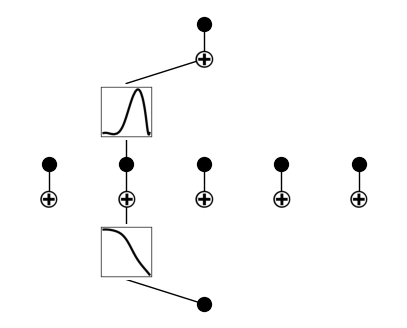

In [13]:
model.plot()

In [15]:
# model = model.prune(edge_th=1e-4)
model = model.refine(20)
model.fit(dataset, opt="LBFGS", steps=20);

saving model version 0.2


| train_loss: 2.72e-05 | test_loss: 1.06e-04 | reg: 4.07e+00 | : 100%|█| 20/20 [00:12<00:00,  1.63it

saving model version 0.3


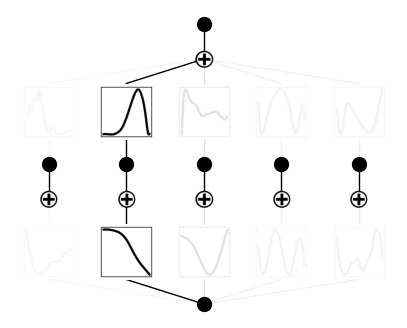

In [17]:
model.plot()


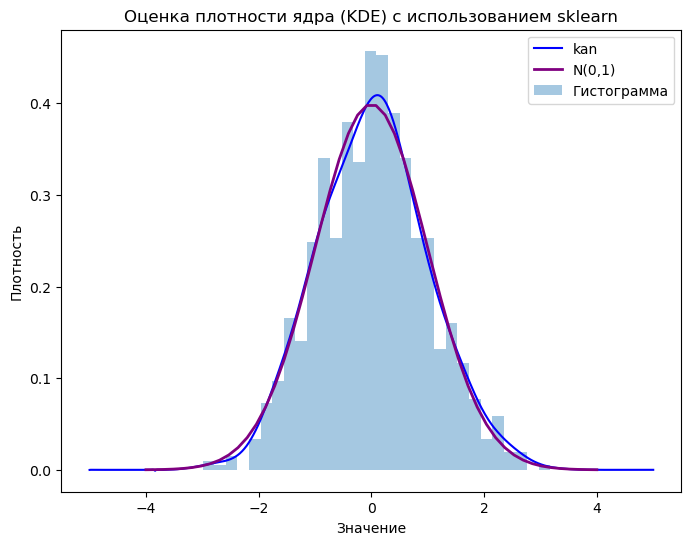

In [43]:
import math
mu = 0      # среднее значение
sigma = 1   # стандартное отклонение
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 50)
y1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
# x= np.linspace(0 , 10 , 100)
# y1  = (np.exp(-1*x))
y = model(torch.from_numpy(x_vals).float())
y = y.detach().numpy()
# y = y * sqrt(2 * math.pi)
plt.figure(figsize=(8, 6))
plt.plot(x_vals[:, 0], y, label="kan", color="blue")
# plt.plot(x_vals[:, 0], density[:,0], label="KDE", color="red")
plt.plot(x, y1, color="purple", lw=2 , label= "N(0,1)")
plt.hist(data, bins=30, density=True, alpha=0.4, label="Гистограмма")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.title("Оценка плотности ядра (KDE) с использованием sklearn")
plt.show()

In [31]:
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.082042 -0.123484           1                1    0.775303
2      sin    0.673178 -1.613379           2                2    1.277324
3      cos    0.673178 -1.613379           2                2    1.277324
4      x^2    0.603619 -1.335005           2                2    1.332999


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 0.0,
 0)

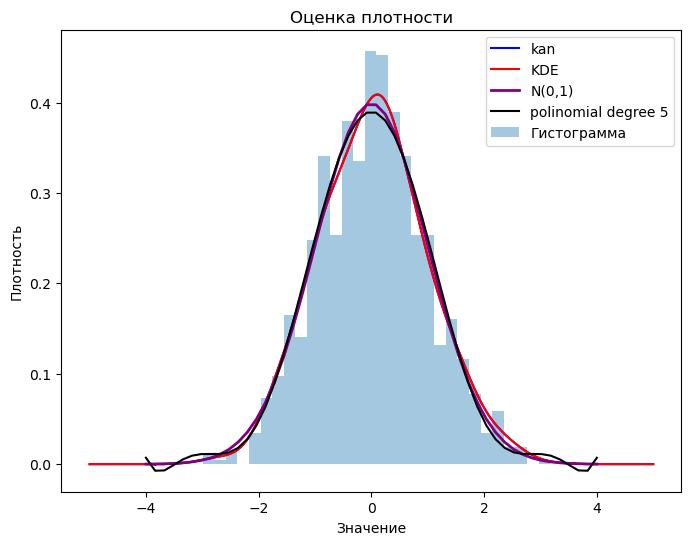

In [33]:
degree = 8  # степень полинома
coefficients = np.polyfit(x, y1, degree)  # коэффициенты полинома
polynomial = np.poly1d(coefficients)  # создаем полиномиальный объект

# Предсказания
y_pred = polynomial(x)
y = model(torch.from_numpy(x_vals).float())
y = y.detach().numpy()
# y = y * sqrt(2 * math.pi)
plt.figure(figsize=(8, 6))
plt.plot(x_vals[:, 0], y, label="kan", color="blue")
plt.plot(x_vals[:, 0], density[:,0], label="KDE", color="red")
plt.plot(x, y1, color="purple", lw=2 , label= "N(0,1)")
plt.plot(x,y_pred, color = 'black' , label= "polinomial degree 5")
plt.hist(data, bins=30, density=True, alpha=0.4, label="Гистограмма")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.title("Оценка плотности")
plt.show()